# Sentiment Analysis 

##### by Anjal Hussan

## Problem Statement
Dataset containing several tweets with positive and negative sentiment associated with it. Our goal is to classify negative tweets from other tweets and filter them out.

# Dataset Description

- The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 
- Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist,our objective is to predict the labels on the given test dataset.

# Attribute Information

- id : The id associated with the tweets in the given dataset
- tweets : The tweets collected from various sources and having either postive or negative sentiments associated with it
- label : A tweet with label '0' is of positive sentiment while a tweet with label '1' is of negative sentiment

## Importing the necessary packages 

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Train dataset used for our analysis

In [2]:
train = pd.read_csv('train.csv')

#### We make a copy of training data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [3]:
train_original=train.copy()

In [98]:
train_original.shape

(31962, 3)

In [99]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [100]:
train_original.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Test dataset used for our analysis

In [101]:
test = pd.read_csv('test.csv')

In [9]:
test_original=test.copy()

In [102]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


#### Here we see that there are a total of 17197 tweets in the test dataset

In [103]:
test_original.shape

(17197, 2)

In [104]:
test_original.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


### We combine Train and Test datasets for pre-processing stage

In [105]:
combine = train.append(test,ignore_index=True,sort=True)

In [106]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [107]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# Data Pre-Processing

##  Removing Twitter Handles (@user)

Define a function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.


In [108]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [109]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [110]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [111]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


## Removing Short Words


Let's remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [112]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


 ## Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [113]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [114]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [115]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Visualization from Tweets


## WordCloud

### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

#### Importing Packages necessary for generating a WordCloud

In [116]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

 #### Store all the words from the dataset which are non-racist/sexist

In [117]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

#### We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is positive tweets. 

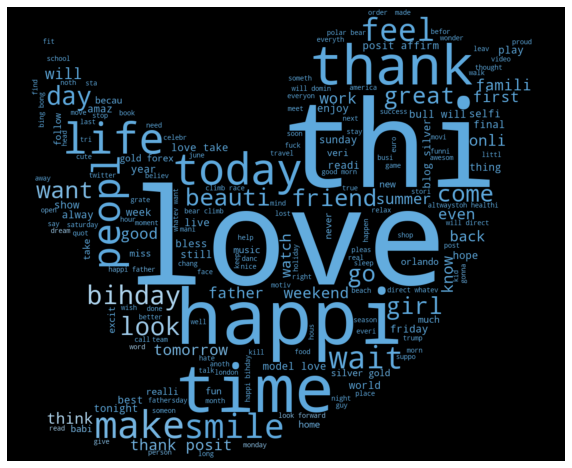

In [118]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Store all the words from the dataset which are negative

In [125]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])
all_words_negative[:200]

'#cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet agre lumpi say prove lumpi unbeliev that centuri'

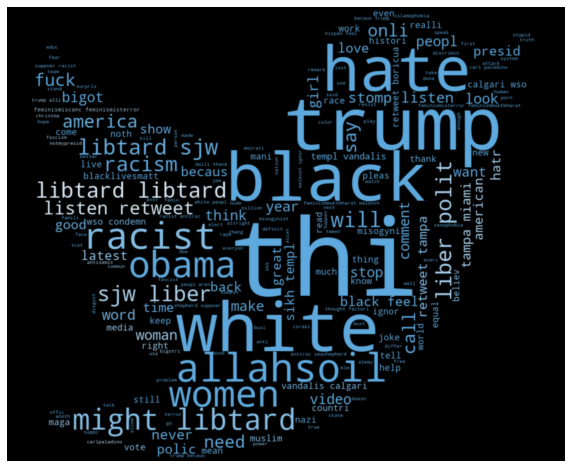

In [131]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Hashtags on tweets sentiment

### Function to extract hashtags from tweets

In [132]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

#### A nested list of all the hashtags from the positive reviews from the dataset

In [133]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

#### Here we unnest the list 

In [134]:
ht_positive_unnest = sum(ht_positive,[])

#### A nested list of all the hashtags from the negative reviews from the dataset

In [135]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

#### Here we unnest the list

In [136]:
ht_negative_unnest = sum(ht_negative,[])

## Plotting BarPlots

### For Positive Tweets in the dataset

#### Counting the frequency of the words having Positive Sentiment 

In [137]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [138]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [139]:
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [140]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

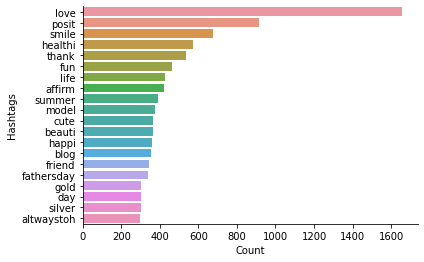

In [141]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

### For Negative Tweets in the dataset

#### Counting the frequency of the words having Negative Sentiment 

In [142]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [143]:
word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [144]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [145]:
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [146]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

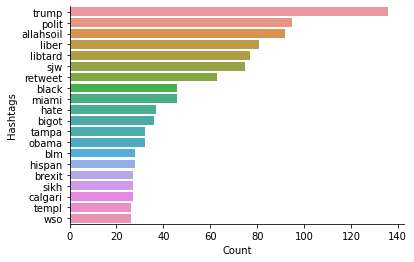

In [147]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

### Bag-of-Words Features

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).


In [178]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Models

### Using the features from Bag-of-Words Model for training set

In [179]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### Splitting the data into training and validation set

In [181]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [182]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)


## Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Using Bag-of-Words Features 

In [185]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [186]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

#### Calculating the F1 score

In [187]:
from sklearn.metrics import f1_score

In [188]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5721352019785655

## XGBoost

In [189]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features 

In [190]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [191]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, ...)

In [192]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9109417e-01, 8.9058345e-03],
       [9.9910688e-01, 8.9310389e-04],
       [9.2758572e-01, 7.2414286e-02],
       ...,
       [8.9067906e-01, 1.0932093e-01],
       [9.2758572e-01, 7.2414286e-02],
       [9.2758572e-01, 7.2414286e-02]], dtype=float32)

#### Calculating the F1 score

In [193]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5811023622047244

## Decision Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [196]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [197]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [198]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.5141776937618148

# Model Comparison

In [199]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

In [200]:
score = [log_bow,xgb_bow,dct_score_bow]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,4)])

In [201]:
compare.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.572135,0.581102,0.514178


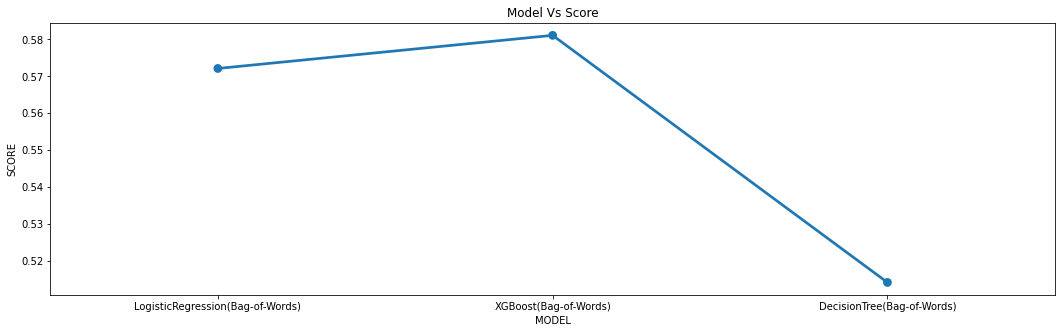

In [202]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#### From the above comaprison graph we can see that XGBClassifier gives us the best performance